<a href="https://colab.research.google.com/github/kshitizs11/Detecting-Pneumonia-in-X-Ray-Images/blob/master/X_Ray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget "https://data.mendeley.com/datasets/rscbjbr9sj/2/files/f12eaf6d-6023-432f-acc9-80c9d7393433/ChestXRay2017.zip?dl=1"

--2020-08-20 12:04:04--  https://data.mendeley.com/datasets/rscbjbr9sj/2/files/f12eaf6d-6023-432f-acc9-80c9d7393433/ChestXRay2017.zip?dl=1
Resolving data.mendeley.com (data.mendeley.com)... 162.159.130.86, 162.159.133.86
Connecting to data.mendeley.com (data.mendeley.com)|162.159.130.86|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com/31ab5ede-ed34-46d4-b1bf-c63d70411497 [following]
--2020-08-20 12:04:04--  https://md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com/31ab5ede-ed34-46d4-b1bf-c63d70411497
Resolving md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com (md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com)... 52.218.112.128
Connecting to md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com (md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com)|52.218.112.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1235512464 (1.2G) [applicatio

In [ ]:
! mkdir images

In [ ]:
!unzip ChestXRay2017.zip?dl=1 -d images/

Streaming output truncated to the last 5000 lines.
  inflating: images/chest_xray/train/PNEUMONIA/person802_bacteria_2708.jpeg  
  inflating: images/chest_xray/train/PNEUMONIA/person902_bacteria_2827.jpeg  
  inflating: images/chest_xray/train/PNEUMONIA/person825_bacteria_2736.jpeg  
  inflating: images/chest_xray/train/PNEUMONIA/person1733_bacteria_4566.jpeg  
  inflating: images/chest_xray/train/PNEUMONIA/person28_bacteria_141.jpeg  
  inflating: images/chest_xray/train/PNEUMONIA/person494_bacteria_2090.jpeg  
  inflating: images/chest_xray/train/PNEUMONIA/person1088_virus_1800.jpeg  
  inflating: images/chest_xray/train/PNEUMONIA/person62_bacteria_300.jpeg  
  inflating: images/chest_xray/train/PNEUMONIA/person1328_virus_2295.jpeg  
  inflating: images/chest_xray/train/PNEUMONIA/person1109_bacteria_3050.jpeg  
  inflating: images/chest_xray/train/PNEUMONIA/person554_bacteria_2320.jpeg  
  inflating: images/chest_xray/train/PNEUMONIA/person573_bacteria_2369.jpeg  
  inflating: images

In [ ]:
import os
for dirc in os.listdir("images/chest_xray/train"):
  p = "images/chest_xray/train/" + dirc
  if "." in p:
    continue
  img = os.listdir(p)
  print(dirc,len(img))

NORMAL 1349
PNEUMONIA 3884


In [ ]:
import os, shutil
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# if not os.path.isdir("val_dir"):
#   os.mkdir("val_dir")

In [ ]:
classes = ["NORMAL","PNEUMONIA"]

In [ ]:
# for c in classes:
#   if not os.path.isdir("val_dir/" + c):
#     os.mkdir("val_dir/" + c)

In [ ]:
# split = 0.9
# for dirc in os.listdir("images/chest_xray/train"):
#   if ((dirc != "NORMAL") and (dirc != "PNEUMONIA")):
#     break
#   p = "images/chest_xray/train/" + dirc
#   imgs = os.listdir(p)
#   split_size = int(len(imgs)*split)
#   files_to_move = imgs[split_size:]
#   print(files_to_move)
#   print()
#   for f in files_to_move:
#     src = os.path.join(p,f)
#     dest = os.path.join("val_dir/",dirc)
#     shutil.move(src,dest)


In [ ]:
# !rm -rf images/

In [ ]:
for dirc in os.listdir("images/chest_xray/train"):
  p = "images/chest_xray/train/" + dirc
  if "." in p:
    continue
  img = os.listdir(p)
  print(dirc,len(img))

NORMAL 1349
PNEUMONIA 3884


In [ ]:
# for dirc in os.listdir("val_dir/"):
#     p = "val_dir/" + dirc
#     if "." in p:
#         continue
#     img = os.listdir(p)
#     print(dirc, len(img))

In [ ]:
for dirc in os.listdir("images/chest_xray/test"):
  p = "images/chest_xray/test/" + dirc
  if "." in p:
    continue
  img = os.listdir(p)
  print(dirc,len(img))

NORMAL 234
PNEUMONIA 390


# Image Augmentation Without imgaug




---



In [ ]:
# from keras.preprocessing import image
from keras.preprocessing import image
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input,decode_predictions
from keras.layers import Input, Conv2D, MaxPool2D, Dense, Flatten
from keras.models import Model
from keras.utils import to_categorical

import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten,BatchNormalization 
from keras.utils import to_categorical


from sklearn.utils import shuffle


from keras_preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = image.ImageDataGenerator(validation_split=0.1,rotation_range=20
                                         ,width_shift_range = 0.2,
                                         height_shift_range = 0.2,
                                         shear_range=0.2,
                                         zoom_range=0.3,
                                         horizontal_flip=True
                                         )

In [ ]:
# val_datagen = image.ImageDataGenerator(rotation_range=20
#                                          ,width_shift_range = 0.2,
#                                          height_shift_range = 0.2,
#                                          shear_range=0.2,
#                                          zoom_range=0.3,
#                                          horizontal_flip=True)

In [ ]:
dic = {"NORMAL":0,"PNEUMONIA":1}
rev_dic = {0:"NORMAL",1:"PNEUMONIA"}

In [ ]:
x = []
y = []
for folder in os.listdir("images/chest_xray/train"):
  if ((folder != "NORMAL") and (folder != "PNEUMONIA")):
    break
  p = "images/chest_xray/train/" + folder
  all_images = os.listdir(p)
  # print(folder)
  for im in all_images:
    # print(im)
    if im.split(".")[1] != "jpeg":
      continue
    # print(im.split(".")[0])
    im = image.load_img(os.path.join(p,im),target_size=(150,150))
    im = image.img_to_array(im)/255
    im = np.array(im)
    x.append(im)
    y.append(dic[folder])

In [ ]:
x_train = np.array(x)
y_train = np.array(y)
x_train.shape,y_train.shape

((5232, 150, 150, 3), (5232,))

In [ ]:
x = []
y = []
for folder in os.listdir("images/chest_xray/test"):
  if ((folder != "NORMAL") and (folder != "PNEUMONIA")):
    break
  p = "images/chest_xray/test/" + folder
  all_images = os.listdir(p)
  # print(folder)
  for im in all_images:
    # print(im)
    if im.split(".")[1] != "jpeg":
      continue
    # print(im.split(".")[0])
    im = image.load_img(os.path.join(p,im),target_size=(150,150))
    im = image.img_to_array(im)/255
    im = np.array(im)
    x.append(im)
    y.append(dic[folder])

In [ ]:
x_test = np.array(x)
y_test = np.array(y)
x_test.shape,y_test.shape

((624, 150, 150, 3), (624,))

In [ ]:
# x = []
# y = []
# for folder in os.listdir("val_dir"):
#   if ((folder != "NORMAL") and (folder != "PNEUMONIA")):
#     break
#   p = "val_dir/" + folder
#   all_images = os.listdir(p)
#   # print(folder)
#   for im in all_images:
#     # print(im)
#     if im.split(".")[1] != "jpeg":
#       continue
#     # print(im.split(".")[0])
#     im = image.load_img(os.path.join(p,im),target_size=(150,150))
#     im = image.img_to_array(im)/255
#     im = np.array(im)
#     x.append(im)
#     y.append(dic[folder])

In [ ]:
# x_val = np.array(x)
# y_val = np.array(y)
# x_val.shape,y_val.shape

In [ ]:
from sklearn.utils import shuffle
x_train,y_train = shuffle(x_train,y_train,random_state=2)
# x_val,y_val = shuffle(x_val,y_val,random_state=2)

In [ ]:
y_train =to_categorical(y_train)

In [ ]:
y_train.shape

(5232, 2)

In [ ]:
# y_val = to_categorical(y_val)

In [ ]:
# y_val.shape

In [ ]:
x_train.shape,y_train.shape

((5232, 150, 150, 3), (5232, 2))

In [ ]:
training_generator = train_datagen.flow(x_train,y_train,batch_size=32,subset="training",seed=42)
validation_generator = train_datagen.flow(x_train,y_train,batch_size=32,subset="validation",seed=42)

In [ ]:
y_train

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [ ]:
y_test = to_categorical(y_test)

In [ ]:
model = Sequential()
model.add(Conv2D(filters=128,kernel_size=(3,3),activation = "relu",input_shape=(150,150,3)))
model.add(MaxPool2D(pool_size= (2,2) ))
model.add(Conv2D(filters=128,kernel_size=(3,3),activation = "relu"))
model.add(MaxPool2D(pool_size= (2,2) ))
model.add(Dropout(0.2))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation = "relu"))
model.add(MaxPool2D(pool_size= (2,2) ))
model.add(Dropout(0.1))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation = "relu"))
model.add(MaxPool2D(pool_size= (3,3) ))
model.add(Dropout(0.1))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation = "relu"))
model.add(MaxPool2D(pool_size= (3,3) ))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(units=64,activation="relu"))
# model.add(Dense(units=32,activation="relu"))
model.add(Dense(units=2,activation="softmax"))


model.compile(optimizer="adam",loss="binary_crossentropy",metrics = ["accuracy"])



model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 128)     3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 36, 36, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        73792     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0

In [ ]:
h= model.fit_generator(
    training_generator,
    steps_per_epoch=(len(x_train)*0.9)//32, 
    epochs=18, 
    validation_data=validation_generator, 
    validation_steps=(len(x_train)*0.1)//32)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/18
147/147 [==============================] - 35s 240ms/step - loss: 0.5802 - accuracy: 0.7447 - val_loss: 0.6156 - val_accuracy: 0.7051
Epoch 2/18
147/147 [==============================] - 35s 236ms/step - loss: 0.5661 - accuracy: 0.7460 - val_loss: 0.5729 - val_accuracy: 0.7012
Epoch 3/18
147/147 [==============================] - 35s 235ms/step - loss: 0.5051 - accuracy: 0.7381 - val_loss: 0.4914 - val_accuracy: 0.7383
Epoch 4/18
147/147 [==============================] - 35s 236ms/step - loss: 0.4567 - accuracy: 0.7597 - val_loss: 0.5084 - val_accuracy: 0.7090
Epoch 5/18
147/147 [==============================] - 35s 236ms/step - loss: 0.4438 - accuracy: 0.7766 - val_loss: 0.4651 - val_accuracy: 0.7324
Epoch 6/18
147/147 [==============================] - 35s 236ms/step - loss: 0.4151 - accuracy: 0.7917 - val_loss: 0.4133 - val_accuracy: 0.7949
Epoch 7/18
147/147 [==============================] - 

In [ ]:
y_pred = []
for i in range(0,x_test.shape[0]):
  y_pred.append(model.predict_classes(x_test[i].reshape(1,150,150,3))[0])
y_pred = np.array(y_pred)

In [ ]:
model.evaluate(x_train,y_train)

164/164 [==============================] - 6s 39ms/step - loss: 0.2172 - accuracy: 0.9157


[0.21717508137226105, 0.915710985660553]

In [ ]:
y_test.shape

(624, 2)

In [ ]:
y_pred.shape

(624,)

In [ ]:
y_prediction = to_categorical(y_pred)

In [ ]:
model.evaluate(x_test,y_test)

20/20 [==============================] - 1s 39ms/step - loss: 0.2892 - accuracy: 0.9006


[0.2891762852668762, 0.9006410241127014]

In [ ]:
model.evaluate(x_test,y_prediction)

20/20 [==============================] - 1s 39ms/step - loss: 0.1942 - accuracy: 1.0000


[0.1942426860332489, 1.0]

In [ ]:
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
import matplotlib.pyplot as plt

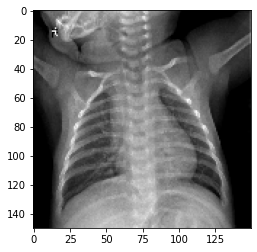

In [ ]:
plt.imshow(x_train[0].reshape(150,150,3))